<a href="https://colab.research.google.com/github/obeabi/SdsNovember2020Challenge/blob/main/Main_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #3 - Fraudulent Job Adverts
## 2021-01-22

### Using CatBoost ALGORTHIM

## Problem Statement
Welcome Data Scientist to the 3rd SDS Club Monthly Challenge! In this month’s challenge you are helping your friend search for a job. Your friend has found thousands of job ads online and is trying to pick some to apply to. Your friends has heard that there are a lot of fraudulent job ads that are actually scams. Your mission is to help your friend by predicting whether a job is fraudulent based on the data provided.

In [319]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install imbalanced-learn
!pip install catboost


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [320]:
# Importing the dataset and check the shape and total number of missing values

df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

df_train.head()

,telecommuting,has_company_logo,has_questions,fraudulent,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1
4,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1


In [321]:
# drop all indicator columns
#df_train.drop(df_train.iloc[:, 4:], axis = 1, inplace= True)
#df_train.drop(['department_ind','salary_range_ind','requirements_ind','benefits_ind','industry_ind'], axis = 1, inplace= True)
#df_train.head()

In [322]:
# print column names
print(df_train.columns)
print(df_train.shape)

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'department_ind', 'salary_range_ind', 'company_profile_ind',
       'description_ind', 'requirements_ind', 'benefits_ind',
       'employment_type_ind', 'required_experience_ind',
       'required_education_ind', 'industry_ind', 'function_ind'],
      dtype='object')
(14304, 15)


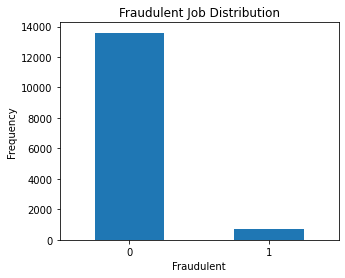

In [323]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_train['fraudulent'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Fraudulent Job Distribution")
plt.xticks(range(2))
plt.xlabel("Fraudulent")
plt.ylabel('Frequency')
plt.show()

In [324]:
# gET THE CANCELLED AND NOT CANCEELED FLIFGTS
Fraud = df_train[df_train['fraudulent']== 1]
notFraud = df_train[df_train['fraudulent']== 0]

print(Fraud.shape, notFraud.shape)

(709, 15) (13595, 15)


In [325]:
# Extract features and target from train set dataframe
y = df_train.fraudulent.values.ravel()
X = df_train.drop(columns= ['fraudulent'], axis = 1)

X.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,1,0,1,0,0,1,1,1,1,1
4,0,1,0,1,1,1,1,1,1,1,1,1,1,1


In [326]:
# print first five rows target column
y[0:5]

array([0, 0, 0, 1, 0])

In [327]:
# Split data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Organize train set
X_train.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
144,0,1,0,0,0,1,1,1,1,1,1,1,1,1
2663,0,1,1,0,0,1,1,1,1,1,1,0,1,1
10005,0,0,1,1,0,0,1,1,0,0,0,0,0,0
13607,0,1,1,1,0,1,1,1,1,1,1,1,1,1
4894,0,0,1,0,0,1,1,1,0,1,1,0,1,1


### Model 1: Train Model Directly (disregarding imbalanced nature of dataset

In [328]:
# Train Random Forest Classifier
class_weight=dict({0:1,1:15})
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.02917
0:	learn: 0.6456364	total: 6.9ms	remaining: 6.9s
1:	learn: 0.5984603	total: 15.8ms	remaining: 7.87s
2:	learn: 0.5602980	total: 21.4ms	remaining: 7.13s
3:	learn: 0.5256976	total: 26.8ms	remaining: 6.66s
4:	learn: 0.4877470	total: 35.3ms	remaining: 7.02s
5:	learn: 0.4593085	total: 40.3ms	remaining: 6.67s
6:	learn: 0.4306504	total: 48.7ms	remaining: 6.91s
7:	learn: 0.4117428	total: 54ms	remaining: 6.7s
8:	learn: 0.3944988	total: 58.8ms	remaining: 6.47s
9:	learn: 0.3733886	total: 67.5ms	remaining: 6.69s
10:	learn: 0.3528780	total: 76.2ms	remaining: 6.85s
11:	learn: 0.3394433	total: 81.1ms	remaining: 6.68s
12:	learn: 0.3224527	total: 92.6ms	remaining: 7.03s
13:	learn: 0.3111666	total: 97.8ms	remaining: 6.89s
14:	learn: 0.3010449	total: 106ms	remaining: 6.95s
15:	learn: 0.2871916	total: 114ms	remaining: 7.01s
16:	learn: 0.2755525	total: 120ms	remaining: 6.95s
17:	learn: 0.2632281	total: 129ms	remaining: 7.02s
18:	learn: 0.2557003	total: 137ms	remaining: 7.06s
19:

In [329]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=classifier.predict(X_valid)
y_pred_proba = classifier.predict_proba(X_valid)
print( confusion_matrix(y_valid,y_pred))
print("The accuracy score is :", accuracy_score(y_valid,y_pred))
print( classification_report(y_valid,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid, classifier.predict_proba(X_valid)[:, 1]))

[[2706   20]
 [  98   37]]
The accuracy score is : 0.9587556798322265
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2726
           1       0.65      0.27      0.39       135

    accuracy                           0.96      2861
   macro avg       0.81      0.63      0.68      2861
weighted avg       0.95      0.96      0.95      2861

The roc_auc_score is : 0.8972310535039809


In [330]:
# Apply kfold cross validation
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = classifier, X= X_train, y= y_train, cv = 5)
print("Standard deviation: {} %" .format(accuraccies.std()* 100))
print("Mean: {} %" .format(accuraccies.mean()* 100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.4544964	total: 31.8ms	remaining: 4.52s
7:	learn: 0.4358890	total: 35.4ms	remaining: 4.38s
8:	learn: 0.4125866	total: 40.3ms	remaining: 4.43s
9:	learn: 0.3968260	total: 46.9ms	remaining: 4.64s
10:	learn: 0.3751041	total: 51.9ms	remaining: 4.67s
11:	learn: 0.3560280	total: 56.9ms	remaining: 4.69s
12:	learn: 0.3394997	total: 61.6ms	remaining: 4.68s
13:	learn: 0.3287427	total: 64.7ms	remaining: 4.55s
14:	learn: 0.3184193	total: 68.2ms	remaining: 4.48s
15:	learn: 0.3089958	total: 71.6ms	remaining: 4.4s
16:	learn: 0.2957488	total: 76.4ms	remaining: 4.42s
17:	learn: 0.2879501	total: 79.7ms	remaining: 4.35s
18:	learn: 0.2763749	total: 84.4ms	remaining: 4.36s
19:	learn: 0.2658331	total: 89.3ms	remaining: 4.38s
20:	learn: 0.2560266	total: 94ms	remaining: 4.38s
21:	learn: 0.2474329	total: 98.6ms	remaining: 4.38s
22:	learn: 0.2405092	total: 102ms	remaining: 4.34s
23:	learn: 0.2339579	total: 107ms	remaining: 4.35s
24:	learn: 0.2268389	t

In [331]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=classifier.predict(X_valid)
y_pred_proba = classifier.predict_proba(X_valid)
print( confusion_matrix(y_valid,y_pred))
print("The accuracy score is :", accuracy_score(y_valid,y_pred))
print( classification_report(y_valid,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid, classifier.predict_proba(X_valid)[:, 1]) )

[[2706   20]
 [  98   37]]
The accuracy score is : 0.9587556798322265
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2726
           1       0.65      0.27      0.39       135

    accuracy                           0.96      2861
   macro avg       0.81      0.63      0.68      2861
weighted avg       0.95      0.96      0.95      2861

The roc_auc_score is : 0.8972310535039809


In [332]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_valid.reshape(len(y_valid),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Model 2: Random Oversampling

In [333]:
# Random Oversampling method
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_os,y_os=os.fit_sample(X, y)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_os)))

The number of classes before fit Counter({0: 10869, 1: 574})
The number of classes after fit Counter({0: 13595, 1: 10196})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [334]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_os, X_valid_os, y_train_os, y_valid_os = train_test_split(X_os, y_os,train_size=0.8, test_size=0.2, random_state=0)
classifier2 = CatBoostClassifier()
classifier2.fit(X_train_os,y_train_os)

# Apply kfold cross validation
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = classifier2, X= X_train_os, y= y_train_os, cv = 3)
print("Standard deviation: {} %" .format(accuraccies.std()* 100))
print("Mean: {} %" .format(accuraccies.mean()* 100))

Learning rate set to 0.036247
0:	learn: 0.6699703	total: 11.4ms	remaining: 11.4s
1:	learn: 0.6474315	total: 22.7ms	remaining: 11.3s
2:	learn: 0.6274890	total: 33.7ms	remaining: 11.2s
3:	learn: 0.6096252	total: 44.6ms	remaining: 11.1s
4:	learn: 0.5926356	total: 55.4ms	remaining: 11s
5:	learn: 0.5784793	total: 68.5ms	remaining: 11.3s
6:	learn: 0.5670468	total: 80.7ms	remaining: 11.4s
7:	learn: 0.5541746	total: 93.5ms	remaining: 11.6s
8:	learn: 0.5426749	total: 105ms	remaining: 11.5s
9:	learn: 0.5330929	total: 116ms	remaining: 11.4s
10:	learn: 0.5222046	total: 131ms	remaining: 11.8s
11:	learn: 0.5125459	total: 142ms	remaining: 11.7s
12:	learn: 0.5040804	total: 153ms	remaining: 11.6s
13:	learn: 0.4971144	total: 164ms	remaining: 11.6s
14:	learn: 0.4913387	total: 175ms	remaining: 11.5s
15:	learn: 0.4839220	total: 186ms	remaining: 11.4s
16:	learn: 0.4782545	total: 201ms	remaining: 11.6s
17:	learn: 0.4723279	total: 213ms	remaining: 11.6s
18:	learn: 0.4678277	total: 224ms	remaining: 11.5s
19:	l

In [335]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=classifier2.predict(X_valid_os)
y_pred_proba = classifier2.predict_proba(X_valid_os)
print( confusion_matrix(y_valid_os,y_pred))
print("The accuracy score is :", accuracy_score(y_valid_os,y_pred))
print( classification_report(y_valid_os,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid_os, classifier2.predict_proba(X_valid_os)[:, 1]) )

[[2350  379]
 [ 312 1718]]
The accuracy score is : 0.8548014288716117
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2729
           1       0.82      0.85      0.83      2030

    accuracy                           0.85      4759
   macro avg       0.85      0.85      0.85      4759
weighted avg       0.86      0.85      0.86      4759

The roc_auc_score is : 0.9369354335029523


In [336]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_valid_os.reshape(len(y_valid_os),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


### Model 3: SMOTEK

In [337]:
# Oversampling method 
# Class to perform over-sampling using SMOTE and cleaning using Tomek links.

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_sm,y_sm = smk.fit_sample(X,y)

# Inspect resampled dataset
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_sm))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({0: 13595, 1: 709})
Resampled dataset shape Counter({0: 13595, 1: 13595})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [338]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(X_sm, y_sm,train_size=0.8, test_size=0.2, random_state=0)

classifier3 = CatBoostClassifier()
classifier3.fit(X_train_sm,y_train_sm)

# Apply kfold cross validation
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = classifier3, X= X_train_sm, y= y_train_sm, cv = 3)
print("Standard deviation: {} %" .format(accuraccies.std()* 100))
print("Mean: {} %" .format(accuraccies.mean()* 100))

Learning rate set to 0.038375
0:	learn: 0.6668081	total: 13.2ms	remaining: 13.2s
1:	learn: 0.6425900	total: 25.2ms	remaining: 12.6s
2:	learn: 0.6214196	total: 37ms	remaining: 12.3s
3:	learn: 0.6024242	total: 49ms	remaining: 12.2s
4:	learn: 0.5845578	total: 62.3ms	remaining: 12.4s
5:	learn: 0.5693893	total: 75.2ms	remaining: 12.5s
6:	learn: 0.5555215	total: 88ms	remaining: 12.5s
7:	learn: 0.5422607	total: 100ms	remaining: 12.4s
8:	learn: 0.5294314	total: 116ms	remaining: 12.8s
9:	learn: 0.5177301	total: 129ms	remaining: 12.8s
10:	learn: 0.5079683	total: 141ms	remaining: 12.7s
11:	learn: 0.4997034	total: 154ms	remaining: 12.6s
12:	learn: 0.4909364	total: 171ms	remaining: 13s
13:	learn: 0.4834335	total: 184ms	remaining: 12.9s
14:	learn: 0.4765219	total: 201ms	remaining: 13.2s
15:	learn: 0.4691690	total: 213ms	remaining: 13.1s
16:	learn: 0.4637456	total: 225ms	remaining: 13s
17:	learn: 0.4577194	total: 237ms	remaining: 12.9s
18:	learn: 0.4527683	total: 249ms	remaining: 12.9s
19:	learn: 0.4

In [339]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
y_pred=classifier3.predict(X_valid_sm)
y_pred_proba = classifier3.predict_proba(X_valid_sm)
print( confusion_matrix(y_valid_sm,y_pred))
print("The accuracy score is :", accuracy_score(y_valid_sm,y_pred))
print( classification_report(y_valid_sm,y_pred))
print("The roc_auc_score is :",roc_auc_score(y_valid_sm, classifier3.predict_proba(X_valid_sm)[:, 1]) )

[[2325  334]
 [ 461 2318]]
The accuracy score is : 0.8538065465244575
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2659
           1       0.87      0.83      0.85      2779

    accuracy                           0.85      5438
   macro avg       0.85      0.85      0.85      5438
weighted avg       0.85      0.85      0.85      5438

The roc_auc_score is : 0.9379300185767079


### Save best CatBoost Model


In [340]:
# Save model as a pickle file
import pickle
filename = 'catboost.pickle'
pickle.dump(classifier3, open(filename, 'wb'))

## Make prediction on test set with best model

In [341]:
# Best model was obtained with random over sampling method
column_names = X.columns
dataset_test = df_test[column_names]

dataset_test.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,0,1,1,1,1,1,1,0,1,0
1,0,1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,0,0,0,1,1,1,0,0,1,1,1,1,1
3,0,0,0,1,0,0,1,1,1,0,0,0,0,0
4,0,1,0,0,0,1,1,1,0,1,1,1,1,1


In [342]:
# Make prediction
X_test = dataset_test.values
loaded_model = pickle.load(open('catboost.pickle', 'rb'))
y_hat = loaded_model.predict(X_test)
y_hat

array([0, 0, 0, ..., 1, 0, 0])

In [343]:
 # Save Numpy array to csv with custom header and footer
np.savetxt('catboost_20210123.csv', y_hat, delimiter=',', fmt='%d' , header='Result:: Header', footer='This is footer')